In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/content/ANN_data.xlsx"

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Average
0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5.0
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4.0
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4.0


In [5]:
df.describe()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Average
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,4.090909,4.404545,4.027273,4.140909,4.118182,3.977273,3.959091,3.900000,3.836364,3.763636,...,4.068182,3.854545,3.913636,4.040909,4.136364,4.022727,3.922727,3.913636,4.081818,3.994835
std,0.574106,0.519024,0.739728,0.567908,0.592677,0.705123,0.650366,0.827054,0.702601,0.647119,...,0.619240,0.659824,0.652914,0.567908,0.548593,0.622582,0.580058,0.624314,0.542812,0.335651
min,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.340909
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.750000,3.000000,3.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.772727
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.954545
75%,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.159091
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
# defining the skill level based on the average
def skill_level_func(x):
  if x > 4.05:
    return "High"
  elif x > 3.8:
    return "Medium"
  else:
    return "Low"

In [7]:
# adding skill level column
df["Skill_level"] = df["Average"].transform(skill_level_func)

In [8]:
features = df.iloc[:, :-2]
target = df["Skill_level"]

In [9]:
features.head()

,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,...,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59
0,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
1,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
4,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [10]:
target.head()

0      High
1      High
2      High
3    Medium
4    Medium
Name: Skill_level, dtype: object

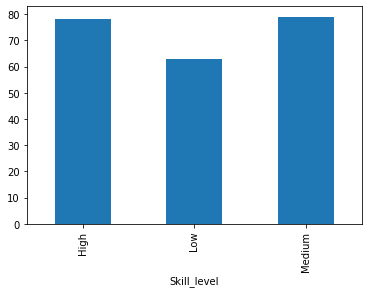

In [11]:
df.groupby('Skill_level').Average.count().plot.bar(ylim = 0)

Classes look almost uniformly distributed from the graph.

In [12]:
# normalize the data to have mean 0 and variance 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [13]:
features

array([[ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  ,  1.69538515],
       ...,
       [-0.15871017,  1.14987513, -1.39188318, ...,  0.13351929,
        -1.4667626 , -0.15107392],
       [-1.904522  ,  1.14987513,  1.31797788, ...,  1.861416  ,
         1.744061  , -0.15107392],
       [ 1.58710166,  1.14987513,  1.31797788, ...,  0.13351929,
        -1.4667626 , -0.15107392]])

In [14]:
# converting class name to integer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(target)
encoded_target = encoder.transform(target)

In [15]:
target = to_categorical(encoded_target) # one hot encoding of the target

In [16]:
features.shape

(220, 44)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [20]:
# define a keras model for multiclass classification
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    Dense(64, activation='relu', input_shape=(features.shape[1],)),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])	# compile the model


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2880      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


In [22]:
for layer in model.layers:
    print(layer.output_shape)

(None, 64)
(None, 3)


In [23]:
num_epochs = 100
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
6/6 - 1s - loss: 1.5079 - accuracy: 0.3125 - precision: 0.2593 - recall: 0.1591 - val_loss: 1.2224 - val_accuracy: 0.3409 - val_precision: 0.3793 - val_recall: 0.2500 - 1s/epoch - 175ms/step
Epoch 2/100
6/6 - 0s - loss: 1.1850 - accuracy: 0.3750 - precision: 0.3514 - recall: 0.2216 - val_loss: 0.9931 - val_accuracy: 0.4545 - val_precision: 0.5556 - val_recall: 0.3409 - 48ms/epoch - 8ms/step
Epoch 3/100
6/6 - 0s - loss: 0.9635 - accuracy: 0.4716 - precision: 0.5567 - recall: 0.3068 - val_loss: 0.8324 - val_accuracy: 0.6136 - val_precision: 0.7037 - val_recall: 0.4318 - 69ms/epoch - 12ms/step
Epoch 4/100
6/6 - 0s - loss: 0.8027 - accuracy: 0.6250 - precision: 0.7170 - recall: 0.4318 - val_loss: 0.7301 - val_accuracy: 0.7045 - val_precision: 0.7586 - val_recall: 0.5000 - 39ms/epoch - 6ms/step
Epoch 5/100
6/6 - 0s - loss: 0.6952 - accuracy: 0.7045 - precision: 0.7913 - recall: 0.5170 - val_loss: 0.6643 - val_accuracy: 0.7045 - val_precision: 0.7667 - val_recall: 0.5227 - 34ms/e

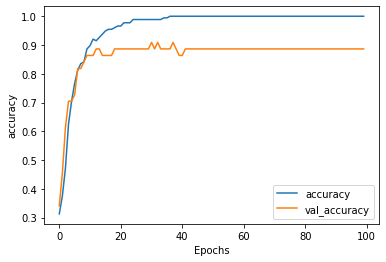

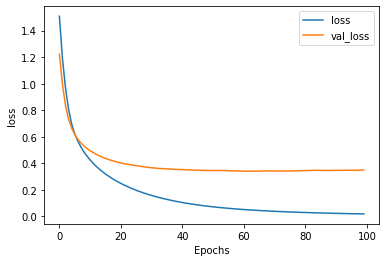

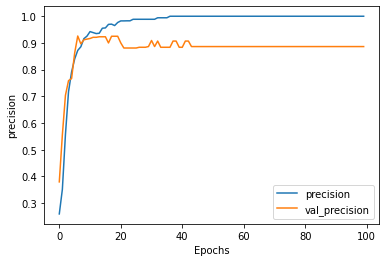

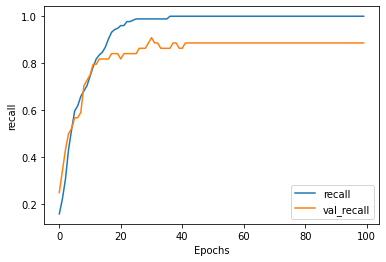

In [24]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
plot_graphs(history, "precision")
plot_graphs(history, "recall")

In [25]:
print(model.predict(X_test))

[[4.5575578e-02 2.3344989e-01 7.2097456e-01]
 [2.3791895e-03 9.0137748e-03 9.8860711e-01]
 [4.4425339e-03 1.7232377e-02 9.7832507e-01]
 [9.5736343e-01 4.1979034e-03 3.8438596e-02]
 [9.1055143e-01 2.9553890e-03 8.6493134e-02]
 [6.9861911e-13 9.9999535e-01 4.6395057e-06]
 [6.7112386e-01 3.3994537e-04 3.2853621e-01]
 [2.0073593e-02 6.6653019e-01 3.1339622e-01]
 [9.9988580e-01 8.7992916e-08 1.1411422e-04]
 [2.6496521e-01 1.5081064e-02 7.1995366e-01]
 [6.0920483e-01 5.6427141e-04 3.9023092e-01]
 [3.6052749e-02 2.3821707e-01 7.2573012e-01]
 [2.6522449e-07 7.4117738e-01 2.5882232e-01]
 [1.4797589e-01 6.4805862e-03 8.4554344e-01]
 [4.9884557e-06 6.4307392e-02 9.3568760e-01]
 [9.5267290e-01 6.9721672e-04 4.6629939e-02]
 [1.3429853e-04 4.1258389e-01 5.8728182e-01]
 [8.5528159e-01 1.0545178e-03 1.4366381e-01]
 [9.9896181e-01 7.1833693e-07 1.0375079e-03]
 [2.5905716e-01 2.2060641e-03 7.3873675e-01]
 [6.1967029e-08 7.6725399e-01 2.3274590e-01]
 [6.7447507e-01 5.4277469e-05 3.2547063e-01]
 [3.052649